In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('House Price India.csv')

In [3]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [4]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [6]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [7]:
df['Renovation Year'].value_counts()

Renovation Year
0       13953
2014       76
2013       30
2003       27
2005       23
        ...  
1948        1
1967        1
1944        1
1959        1
1962        1
Name: count, Length: 68, dtype: int64

In [8]:
l = ['living_area_renov','lot_area_renov','grade of the house','Postal Code','Lattitude','Longitude','Date',]

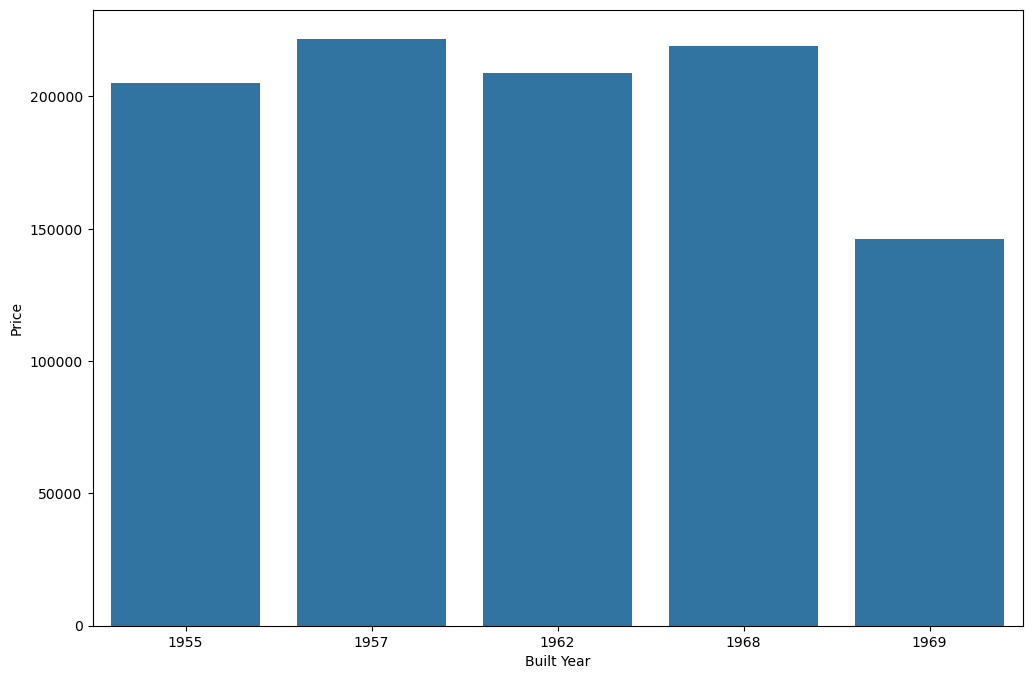

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(x='Built Year',y='Price',data=df.tail())
plt.show()

In [10]:
df.tail()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14614,6762830250,42734,2,1.5,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.0,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.0,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.0,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
14618,6762831463,42734,3,1.0,900,4770,1.0,0,0,3,...,1969,2009,122018,52.5338,-114.552,900,3480,2,55,146000


In [11]:

X = df.drop(columns='Price')

In [12]:
X

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,0,1957,0,122066,52.6191,-114.472,2250,17286,3,76
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,0,1968,0,122072,52.5075,-114.393,1540,7480,3,59
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,0,1962,0,122056,52.7289,-114.507,1130,6120,2,64
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,0,1955,0,122042,52.7157,-114.411,1420,6631,3,54


In [13]:
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [14]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [16]:
df['number of bathrooms'] = df['number of bathrooms'].apply(lambda x:int(x))

In [17]:
df['number of bedrooms'].value_counts()

number of bedrooms
3     6612
4     4724
2     1844
5     1078
6      176
1      136
7       30
8       11
9        3
10       3
33       1
11       1
Name: count, dtype: int64

In [20]:
df['number of floors'] = df['number of floors'].apply(lambda x:int(x))

In [21]:
df['number of views'].value_counts()

number of views
0    13198
2      636
3      351
1      219
4      215
Name: count, dtype: int64

In [23]:
df.drop(columns=l,inplace =True)

In [24]:
df.head()

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Number of schools nearby,Distance from the airport,Price
0,6762810635,4,2,2920,4000,1,0,0,5,1910,1010,1909,0,2,51,1400000
1,6762810998,5,2,2910,9480,1,0,0,3,2910,0,1939,0,1,53,1200000
2,6762812605,4,2,3310,42998,2,0,0,3,3310,0,2001,0,3,76,838000
3,6762812919,3,2,2710,4500,1,0,0,4,1880,830,1929,0,1,51,805000
4,6762813105,3,2,2600,4750,1,0,0,4,1700,900,1951,0,1,67,790000


In [25]:
X = df.drop(columns='Price')

In [26]:
Y = df['Price']

In [27]:
X

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Number of schools nearby,Distance from the airport
0,6762810635,4,2,2920,4000,1,0,0,5,1910,1010,1909,0,2,51
1,6762810998,5,2,2910,9480,1,0,0,3,2910,0,1939,0,1,53
2,6762812605,4,2,3310,42998,2,0,0,3,3310,0,2001,0,3,76
3,6762812919,3,2,2710,4500,1,0,0,4,1880,830,1929,0,1,51
4,6762813105,3,2,2600,4750,1,0,0,4,1700,900,1951,0,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,2,1,1556,20000,1,0,0,4,1556,0,1957,0,3,76
14615,6762830339,3,2,1680,7000,1,0,0,4,1680,0,1968,0,3,59
14616,6762830618,2,1,1070,6120,1,0,0,3,1070,0,1962,0,2,64
14617,6762830709,4,1,1030,6621,1,0,0,4,1030,0,1955,0,3,54


In [28]:
Y

0        1400000
1        1200000
2         838000
3         805000
4         790000
          ...   
14614     221700
14615     219200
14616     209000
14617     205000
14618     146000
Name: Price, Length: 14619, dtype: int64

In [30]:
X.isnull().sum().sum()

0

In [31]:
Y.isnull().sum()

0

In [32]:
X.duplicated().sum()

0

In [34]:
cor = df.corr()

<Axes: >

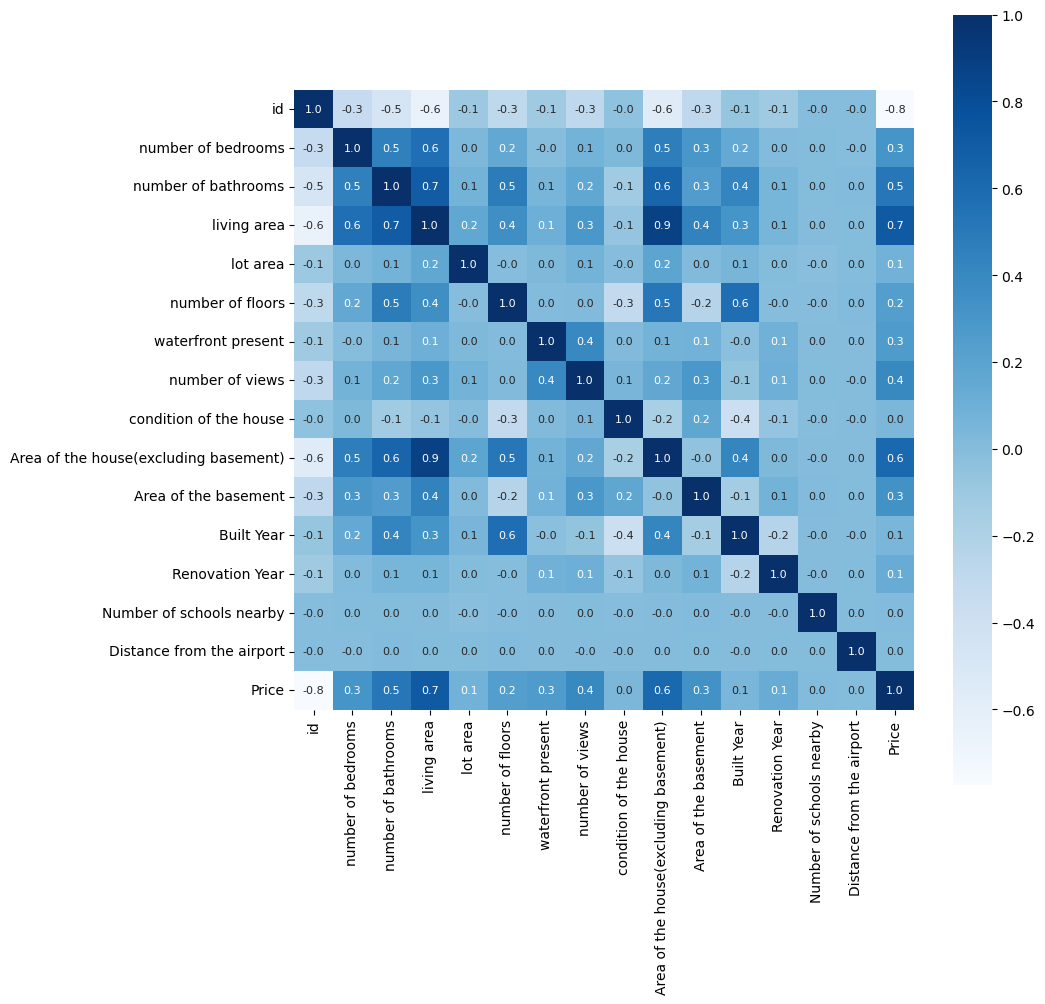

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [41]:
X_train.shape

(11695, 15)

In [42]:
Y_train.shape

(11695,)

In [43]:
X_test.shape

(2924, 15)

Model Training

In [46]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [47]:
Rd = Ridge(alpha = 1.0)
Rd.fit(X_train,Y_train)


Ridge()

In [48]:
y_pred = Rd.predict(X_test)

In [52]:
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

In [50]:
n_mean = Y.mean(axis=0)

In [51]:
n_mean

538806.2816882139

In [53]:
rmse/n_mean

0.3832571404886521

In [55]:
a =[0.1, 1.0, 10.0, 100.0]
for al in a:
    rd = Ridge(alpha = al)
    rd.fit(X_train,Y_train)
    preds =rd.predict(X_test)
    rmse2 = np.sqrt(mean_squared_error(Y_test, preds))
    n_mean = Y.mean(axis=0)
    print(rmse2/n_mean)
    
    

0.3832349756390901
0.3832571404886521
0.3835672049374524
0.38723652362529226


In [56]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 699.0 kB/s eta 0:03:34
   ---------------------------------------- 0.8/150.0 MB 859.5 kB/s eta 0:02:54
   ---------------------------------------- 1.0/150.0 MB 986.7 kB/s eta 0:02:31
   ---------------------------------------- 1.3/150.0 MB 1.2 MB/s eta 0:02:09
   ---------------------------------------- 1.8/150.0 MB 1.3 MB/s eta 0:01:54
    --------------------------------------- 2.1/150.0 MB 1.2 MB/s eta 0:01:59
    --------------------------------------- 2.4/150.0 MB 1.3 MB/s eta 0:01:54
    --------------------------------------- 2.9/150.0 MB 1.4 MB/s eta 0:01:46
    ----------

In [67]:
from xgboost import XGBRegressor
from sklearn import metrics

In [59]:
xgbr = XGBRegressor()

In [60]:
xgbr.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [62]:
preds3 = xgbr.predict(X_test)

In [63]:
rmse3 = np.sqrt(mean_squared_error(Y_test, preds3))

In [65]:
rmse3/n_mean

0.19097265384595213

In [68]:
#it fits well with XG
score1 = metrics.r2_score(Y_test,preds3)

In [69]:
score1

0.9311720132827759

In [70]:
preds_training = xgbr.predict(X_train)

In [72]:
score2 = metrics.r2_score(Y_train,preds_training)
rmse4 = np.sqrt(mean_squared_error(Y_train, preds_training))
print(score2 , rmse4/n_mean)

0.9994527101516724 0.015658588650064482


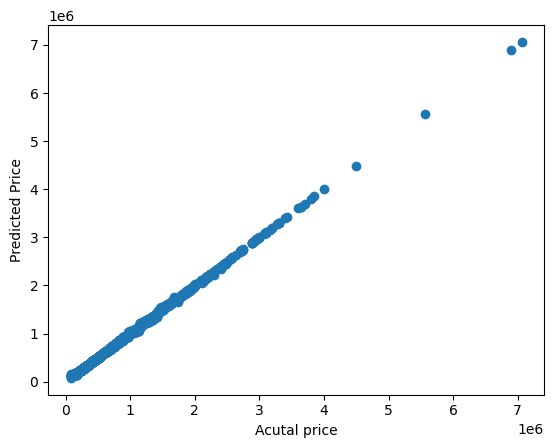

In [73]:
plt.scatter(Y_train,preds_training)
plt.xlabel("Acutal price")
plt.ylabel("Predicted Price")
plt.show()